In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
import csv

plt.rcParams['figure.dpi'] = 200


In [18]:
# Load the data

df = pd.read_csv('../data/processed/Model_2_dataset.csv')
df

,Index,States/UTs,Persons killed in road accidents,Persons killed/Lakh Population,Killed per 10000 vehicles,Urban,Rural,non-wearing of helmet,non-wearing of seat belt,over speeding,drunk driving,driving wrong side,jumping red light,using mobile phone
0,1,Andhra Pradesh,8293,15.7,5.4,2092,6201,3042,895,6760,31,322,6,126
1,2,Arunachal Pradesh,148,9.6,3.2,103,45,32,15,65,22,15,0,5
2,3,Assam,2994,8.5,6.0,1591,1403,347,450,1933,139,330,60,122
3,4,Bihar,8898,7.1,6.8,2859,6039,960,180,4928,40,1309,0,13
4,5,Chhattisgarh,5834,19.6,6.6,1168,4666,3714,636,4808,40,147,8,7
5,6,Goa,271,17.3,1.5,77,194,111,10,240,2,0,0,0
6,7,Gujarat,7618,10.8,2.3,2260,5358,2470,891,7236,7,231,0,6
7,8,Haryana,4915,16.5,5.2,2166,2749,571,358,3489,89,176,34,75
8,9,Himachal Pradesh,1032,13.9,5.2,160,872,150,289,304,24,159,0,12
9,10,Jharkhand,3898,10.0,6.0,855,3043,1602,743,3131,125,133,0,12


# Compute populations (in lakhs)

In [3]:
df['Population (lakhs)'] = df['Persons killed in road accidents']/df['Persons killed/Lakh Population']
df

,Index,States/UTs,Persons killed in road accidents,Persons killed/Lakh Population,Killed per 10000 vehicles,Urban,Rural,non-wearing of helmet,non-wearing of seat belt,over speeding,drunk driving,driving wrong side,jumping red light,using mobile phone,Population (lakhs)
0,1,Andhra Pradesh,8293,15.7,5.4,2092,6201,3042,895,6760,31,322,6,126,528.216561
1,2,Arunachal Pradesh,148,9.6,3.2,103,45,32,15,65,22,15,0,5,15.416667
2,3,Assam,2994,8.5,6.0,1591,1403,347,450,1933,139,330,60,122,352.235294
3,4,Bihar,8898,7.1,6.8,2859,6039,960,180,4928,40,1309,0,13,1253.239437
4,5,Chhattisgarh,5834,19.6,6.6,1168,4666,3714,636,4808,40,147,8,7,297.653061
5,6,Goa,271,17.3,1.5,77,194,111,10,240,2,0,0,0,15.664740
6,7,Gujarat,7618,10.8,2.3,2260,5358,2470,891,7236,7,231,0,6,705.370370
7,8,Haryana,4915,16.5,5.2,2166,2749,571,358,3489,89,176,34,75,297.878788
8,9,Himachal Pradesh,1032,13.9,5.2,160,872,150,289,304,24,159,0,12,74.244604
9,10,Jharkhand,3898,10.0,6.0,855,3043,1602,743,3131,125,133,0,12,389.800000


## Compute factors per lakh

In [4]:
factors = ['non-wearing of helmet',
           'non-wearing of seat belt',
           'over speeding',
           'drunk driving',
           'jumping red light',
           'driving wrong side',
           'using mobile phone']

for factor in factors:
    new_column_name = factor + '/Lakh Population'
    df[new_column_name] = df[factor] / df['Population (lakhs)']
    
df

,Index,States/UTs,Persons killed in road accidents,Persons killed/Lakh Population,Killed per 10000 vehicles,Urban,Rural,non-wearing of helmet,non-wearing of seat belt,over speeding,...,jumping red light,using mobile phone,Population (lakhs),non-wearing of helmet/Lakh Population,non-wearing of seat belt/Lakh Population,over speeding/Lakh Population,drunk driving/Lakh Population,jumping red light/Lakh Population,driving wrong side/Lakh Population,using mobile phone/Lakh Population
0,1,Andhra Pradesh,8293,15.7,5.4,2092,6201,3042,895,6760,...,6,126,528.216561,5.759002,1.694381,12.797781,0.058688,0.011359,0.609598,0.238539
1,2,Arunachal Pradesh,148,9.6,3.2,103,45,32,15,65,...,0,5,15.416667,2.075676,0.972973,4.216216,1.427027,0.000000,0.972973,0.324324
2,3,Assam,2994,8.5,6.0,1591,1403,347,450,1933,...,60,122,352.235294,0.985137,1.277555,5.487809,0.394623,0.170341,0.936874,0.346359
3,4,Bihar,8898,7.1,6.8,2859,6039,960,180,4928,...,0,13,1253.239437,0.766015,0.143628,3.932209,0.031917,0.000000,1.044493,0.010373
4,5,Chhattisgarh,5834,19.6,6.6,1168,4666,3714,636,4808,...,8,7,297.653061,12.477614,2.136716,16.153034,0.134385,0.026877,0.493864,0.023517
5,6,Goa,271,17.3,1.5,77,194,111,10,240,...,0,0,15.664740,7.085978,0.638376,15.321033,0.127675,0.000000,0.000000,0.000000
6,7,Gujarat,7618,10.8,2.3,2260,5358,2470,891,7236,...,0,6,705.370370,3.501706,1.263166,10.258441,0.009924,0.000000,0.327488,0.008506
7,8,Haryana,4915,16.5,5.2,2166,2749,571,358,3489,...,34,75,297.878788,1.916887,1.201831,11.712818,0.298779,0.114140,0.590844,0.251780
8,9,Himachal Pradesh,1032,13.9,5.2,160,872,150,289,304,...,0,12,74.244604,2.020349,3.892539,4.094574,0.323256,0.000000,2.141570,0.161628
9,10,Jharkhand,3898,10.0,6.0,855,3043,1602,743,3131,...,0,12,389.800000,4.109800,1.906106,8.032324,0.320677,0.000000,0.341201,0.030785


# Fit multiple linear regression model

In [5]:
factors_per_capita = [factor + '/Lakh Population' for factor in factors]

x = df[factors_per_capita]
y = df['Persons killed/Lakh Population']

In [21]:
# positive=True to make sure the coefficients are positive
model_lr = LinearRegression(positive=True)         
model_lr.fit(x, y)

LinearRegression(positive=True)

In [23]:
# Get feature importances
importance_lr = model_lr.coef_ ** 2
importance_lr

array([0.42597448, 0.60314978, 0.6689237 , 1.14444599, 0.78281133,
       1.54796047, 0.        ])

## Visualize the feature importances

([<matplotlib.patches.Wedge at 0x146cd7790>,
 [Text(1.0634003618552386, 0.2813888242381848, 'non-wearing of helmet'),
  Text(0.697771840561397, 0.8503613693716106, 'non-wearing of seat belt'),
  Text(-0.09376670122455531, 1.0959962617369938, 'over speeding'),
  Text(-1.0197932009533657, 0.41233703118843046, 'drunk driving'),
  Text(-0.7772420468560355, -0.778392446391305, 'jumping red light'),
  Text(0.6487343158445154, -0.8883376539614588, 'driving wrong side'),
  Text(1.0999999999999832, 1.9233011600819372e-07, 'using mobile phone')],
 [Text(0.5800365610119482, 0.15348481322082805, '8.2%'),
  Text(0.3806028221243983, 0.4638334742026966, '11.7%'),
  Text(-0.051145473395211985, 0.597816142765633, '12.9%'),
  Text(-0.556250836883654, 0.22491110792096206, '22.1%'),
  Text(-0.4239502073760193, -0.4245776980316209, '15.1%'),
  Text(0.35385508136973565, -0.48454781125170476, '29.9%'),
  Text(0.5999999999999908, 1.0490733600446929e-07, '0.0%')])

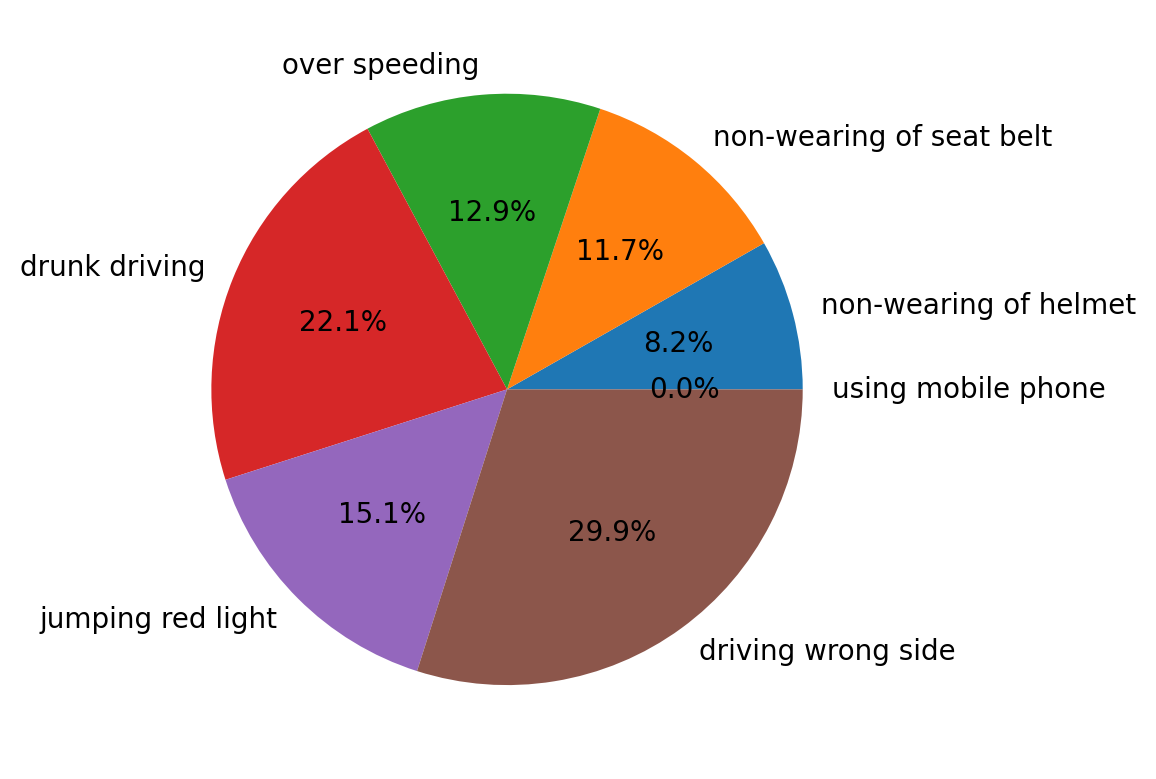

In [24]:
# Visualize the feature importances with a pie chart

# labels = factors
labels = x.columns
labels = [label.replace('/Lakh Population', '') for label in labels]

sizes = importance_lr

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%')

# Ridge regression

In [43]:
# positive=True to make sure the coefficients are positive
model_ridge = Ridge(positive=True, alpha=1.0)
model_ridge.fit(x, y)

Ridge(positive=True)

In [44]:
# Get feature importances
importance_ridge = model_ridge.coef_
importance_ridge

array([0.41203311, 0.63442395, 0.66579597, 0.7513608 , 0.1955497 ,
       1.4174299 , 0.33921414])

([<matplotlib.patches.Wedge at 0x146fe4370>,
 [Text(1.0530760827358405, 0.3178533686619305, 'non-wearing of helmet'),
  Text(0.5590873468927531, 0.9473232492367232, 'non-wearing of seat belt'),
  Text(-0.4201059779246313, 1.01661741442491, 'over speeding'),
  Text(-1.0840119528652747, 0.18686381684321232, 'drunk driving'),
  Text(-0.9637711286064827, -0.530231281295801, 'jumping red light'),
  Text(0.08759290606541725, -1.096506946082429, 'driving wrong side'),
  Text(1.068122825147873, -0.2628947135225935, 'using mobile phone')],
 [Text(0.5744051360377311, 0.17337456472468932, '9.3%'),
  Text(0.3049567346687744, 0.5167217723109399, '14.4%'),
  Text(-0.229148715231617, 0.5545185896863145, '15.1%'),
  Text(-0.5912792470174225, 0.10192571827811579, '17.0%'),
  Text(-0.5256933428762632, -0.2892170625249823, '4.4%'),
  Text(0.04777794876295486, -0.5980946978631431, '32.1%'),
  Text(0.5826124500806579, -0.14339711646686917, '7.7%')])

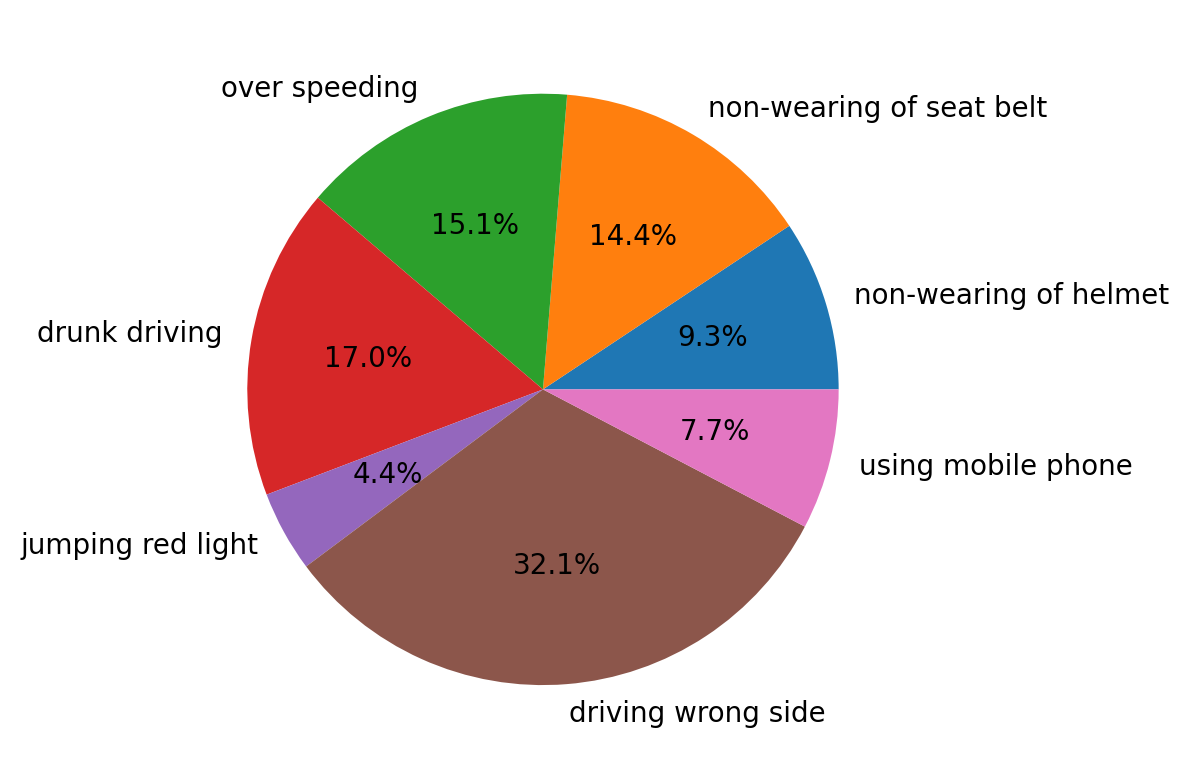

In [45]:
# Visualize the feature importances with a pie chart

# labels = factors
labels = x.columns
labels = [label.replace('/Lakh Population', '') for label in labels]

sizes = importance_ridge

fig2, ax2 = plt.subplots()

ax2.pie(sizes, labels=labels, autopct='%1.1f%%')

# Decision tree regression

In [59]:
model_tree = DecisionTreeRegressor(random_state=0, max_depth=3)
model_tree.fit(x, y)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [60]:
importance_tree = model_tree.feature_importances_
importance_tree

array([0.12000138, 0.01384934, 0.80795124, 0.01151269, 0.        ,
       0.04668535, 0.        ])

([<matplotlib.patches.Wedge at 0x15553ed30>,
 [Text(1.0227523586274692, 0.40494149320852385, 'non-wearing of helmet'),
  Text(0.7683477012882597, 0.7871733036155683, 'non-wearing of seat belt'),
  Text(-1.0690780949700258, -0.2589826767474244, 'over speeding'),
  Text(1.0408246630876583, -0.3559269878900201, 'drunk driving'),
  Text(1.0530143654946558, -0.31805777157913856, 'jumping red light'),
  Text(1.0881902092961948, -0.16075468388791703, 'driving wrong side'),
  Text(1.0999999999992995, 1.2413718640548063e-06, 'using mobile phone')],
 [Text(0.5578649228877104, 0.22087717811374025, '12.0%'),
  Text(0.4190987461572325, 0.4293672565175826, '1.4%'),
  Text(-0.5831335063472867, -0.14126327822586784, '80.8%'),
  Text(0.5677225435023591, -0.19414199339455637, '1.2%'),
  Text(0.574371472087994, -0.17348605722498467, '0.0%'),
  Text(0.5935582959797425, -0.08768437302977292, '4.7%'),
  Text(0.5999999999996178, 6.771119258480762e-07, '0.0%')])

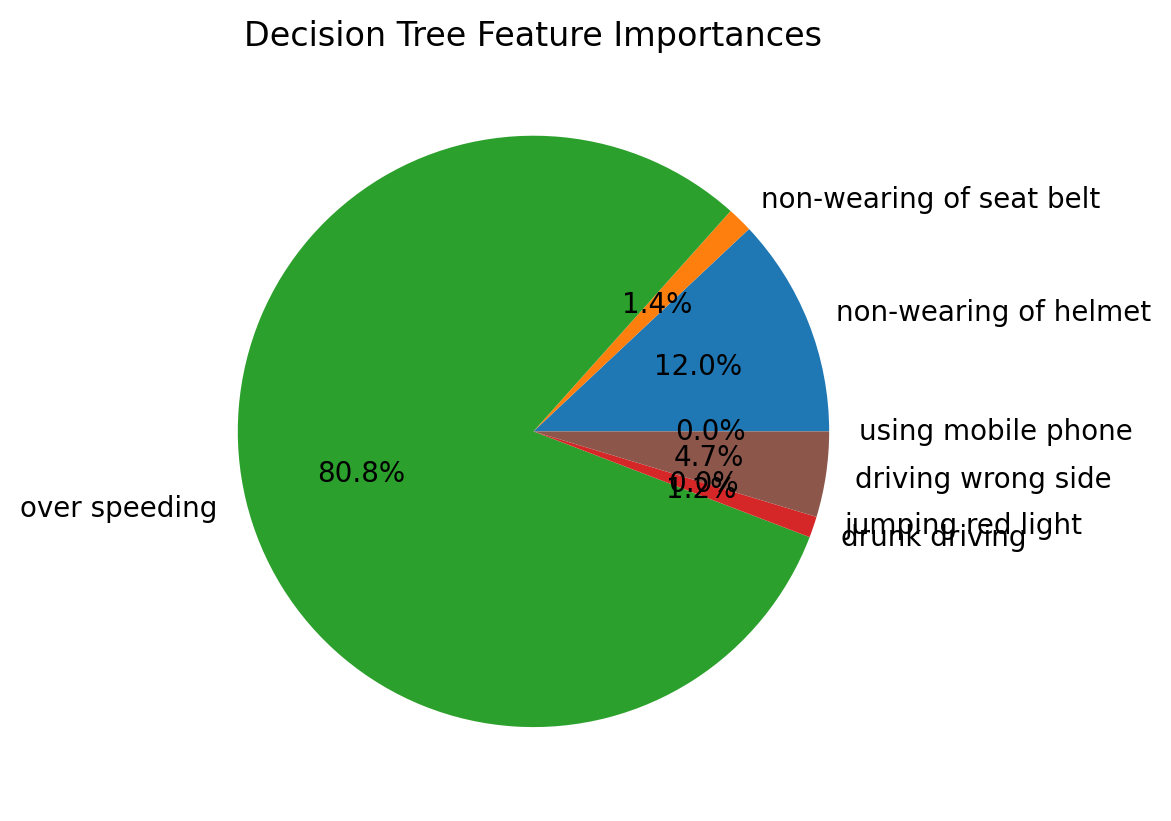

In [62]:
labels = x.columns
labels = [label.replace('/Lakh Population', '') for label in labels]

sizes = importance_tree

fig3, ax3 = plt.subplots()

ax3.set_title('Decision Tree Feature Importances')
ax3.pie(sizes, labels=labels, autopct='%1.1f%%')

# Permutation importance

In [46]:
from sklearn.inspection import permutation_importance


In [55]:
result = permutation_importance(model, x, y, n_repeats=100, random_state=1)

permutation_importances_df = pd.DataFrame({
    'feature': x.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

permutation_importances_df.mean

<bound method DataFrame.mean of                                     feature  importance_mean  importance_std
2             over speeding/Lakh Population         0.829232        0.160807
0     non-wearing of helmet/Lakh Population         0.111510        0.029353
1  non-wearing of seat belt/Lakh Population         0.063157        0.027754
5        driving wrong side/Lakh Population         0.035570        0.019586
3             drunk driving/Lakh Population         0.011540        0.009693
4         jumping red light/Lakh Population         0.000197        0.000892
6        using mobile phone/Lakh Population        -0.000014        0.000998>

([<matplotlib.patches.Wedge at 0x1558085b0>,
 [Text(-0.8667039800576659, 0.6773656405164062, 'non-wearing of helmet'),
  Text(0.6003245360484522, -0.9217431591382769, 'non-wearing of seat belt'),
  Text(0.9799721139629116, -0.4996545365100394, 'over speeding'),
  Text(1.0829186793595846, -0.19309876719982744, 'drunk driving'),
  Text(1.0993004464987608, -0.0392240784165191, 'jumping red light'),
  Text(1.099999809375443, -0.0006475909118948344, 'driving wrong side'),
  Text(1.0999999999996664, -8.567116320385938e-07, 'using mobile phone')],
 [Text(-0.4727476254859995, 0.3694721675544034, '78.9%'),
  Text(0.3274497469355193, -0.5027689958936056, '10.6%'),
  Text(0.5345302439797699, -0.27253883809638507, '6.0%'),
  Text(0.5906829160143189, -0.10532660029081495, '3.4%'),
  Text(0.5996184253629604, -0.021394951863555868, '1.1%'),
  Text(0.5999998960229689, -0.00035323140648809147, '0.0%'),
  Text(0.599999999999818, -4.6729725383923294e-07, '0.0%')])

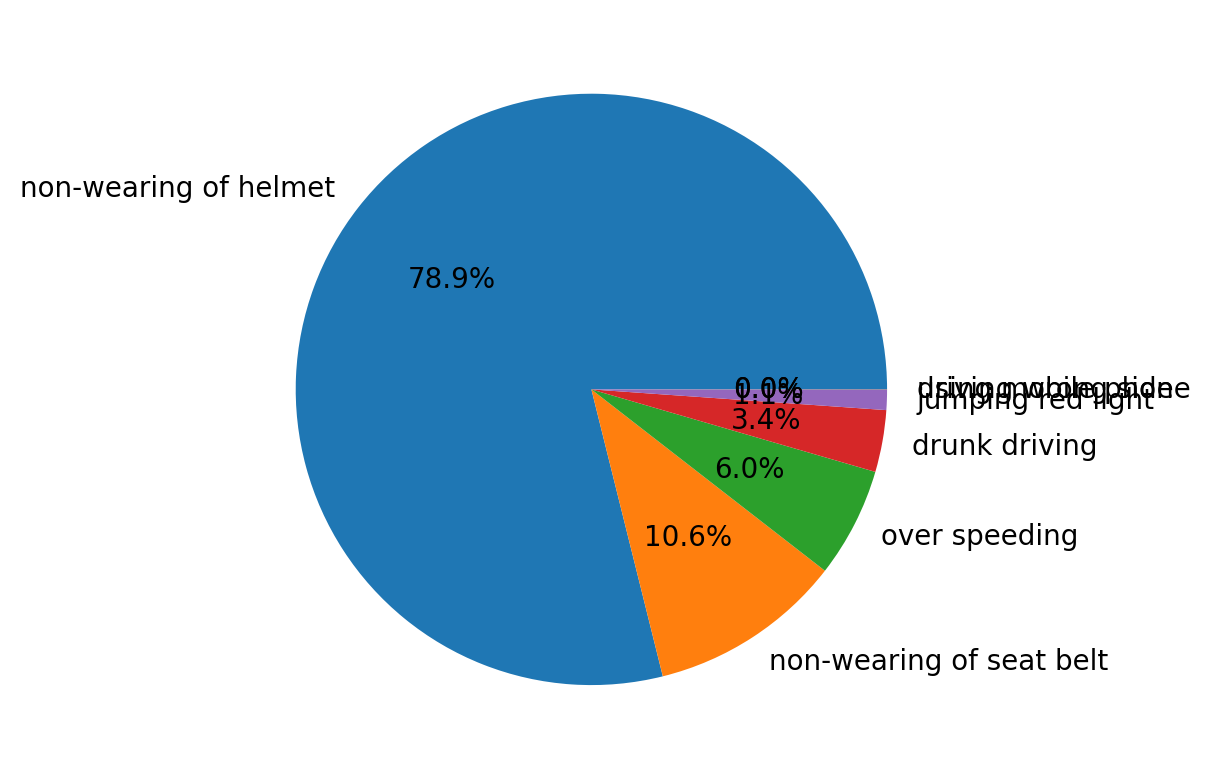

In [58]:
# Visualize the feature importances with a pie chart

# labels = factors
labels = x.columns
labels = [label.replace('/Lakh Population', '') for label in labels]

sizes = np.maximum(permutation_importances_df['importance_mean'], 0)

fig3, ax3 = plt.subplots()

ax3.pie(sizes, labels=labels, autopct='%1.1f%%')